# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
# I defined the line below according 
# to my local installation in Linux and the guide (Banana_Linux folder in the same directory as project)
#env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

We'll be needing this values to specify the Agent parameters.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


When finished, you can close the environment.

## 3. Implementation of the Training methods for the Double Q Learning with Dueling Q Networks

#### Set the double q learning agent

In [5]:
from ddqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### Call the training method from the Trainer Class so we can actually train the Double Q Learning agent with Experience Replay and Dueling Q Networks

In [6]:
from training import Trainer

training = Trainer(env, agent)

scores_train = training.train()

Episode 100	Average Score: 0.81
Episode 200	Average Score: 3.58
Episode 300	Average Score: 7.00
Episode 400	Average Score: 9.84
Episode 500	Average Score: 14.61
Episode 600	Average Score: 14.66
Episode 700	Average Score: 15.49
Episode 800	Average Score: 15.76
Episode 900	Average Score: 16.20
Episode 910	Average Score: 16.53
Environment solved in 810 episodes!	Average Score: 16.53


### Plot the scores throughout all 800 episodes

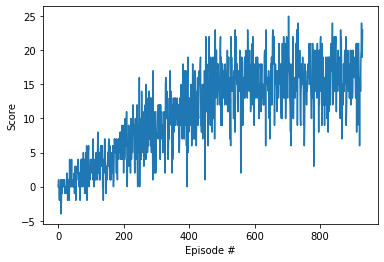

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_train)), scores_train)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 4. Load Smart Agent and Watch it in Action

In [6]:
import torch
#Load the agent into memory from checkpoint.pth
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
#Compute the average scores for 100 episodes and plot them so we can see
#the problem is solved (>=13 score over 100 episodes)
max_t = 1000
n_episodes = 100
scores = []                        # list containing scores from each episode
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0

    while True:
        action = agent.act(state)

        env_info = env.step(action)[brain_name]

        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]

        state = next_state
        score += reward
        if done:
            scores.append(score) 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break


Episode 1	Average Score: 20.00
Episode 2	Average Score: 12.50
Episode 3	Average Score: 14.00
Episode 4	Average Score: 15.50
Episode 5	Average Score: 16.20
Episode 6	Average Score: 15.17
Episode 7	Average Score: 15.29
Episode 8	Average Score: 15.12
Episode 9	Average Score: 16.00
Episode 10	Average Score: 16.40
Episode 11	Average Score: 16.36
Episode 12	Average Score: 16.08
Episode 13	Average Score: 16.31
Episode 14	Average Score: 16.36
Episode 15	Average Score: 16.07
Episode 16	Average Score: 16.19
Episode 17	Average Score: 15.94
Episode 18	Average Score: 15.78
Episode 19	Average Score: 15.84
Episode 20	Average Score: 15.75
Episode 21	Average Score: 16.10
Episode 22	Average Score: 15.45
Episode 23	Average Score: 15.61
Episode 24	Average Score: 15.54
Episode 25	Average Score: 15.60
Episode 26	Average Score: 15.54
Episode 27	Average Score: 15.59
Episode 28	Average Score: 15.68
Episode 29	Average Score: 15.76
Episode 30	Average Score: 15.97
Episode 31	Average Score: 16.16
Episode 32	Averag

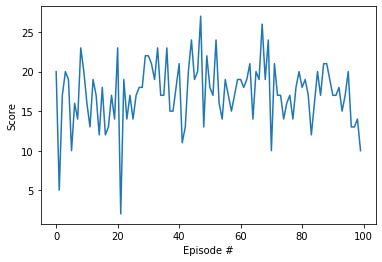

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
env.close()